In [1]:
import torch
import pandas as pd
import numpy as np
from scipy.stats import ranksums
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from itertools import chain

In [2]:
base_path='***'
m='deberta'
merged_dffac = pd.read_csv(f'{base_path}nli_inference_{m}_fac.csv')
merged_dfcau = pd.read_csv(f'{base_path}nli_inference_{m}_cau.csv')

df1afac = pd.read_csv(f'{base_path}merged_part1_fac.csv')
df2afac = pd.read_csv(f'{base_path}merged_part2_fac.csv')
df3afac = pd.read_csv(f'{base_path}merged_part3_fac.csv')
merged_dfafac = pd.concat([df1afac, df2afac, df3afac], ignore_index=True)
df1acau = pd.read_csv(f'{base_path}merged_part1_cau.csv')
df2acau = pd.read_csv(f'{base_path}merged_part2_cau.csv')
df3acau = pd.read_csv(f'{base_path}merged_part3_cau.csv')
merged_dfacau = pd.concat([df1acau, df2acau, df3acau], ignore_index=True)

merged_dffac['origin'] = merged_dfafac['origin']
merged_dfcau['origin'] = merged_dfacau['origin']

fac = merged_dffac[merged_dffac["origin"] == 'fac']
nofac = merged_dffac[merged_dffac["origin"] == 'nofac']
#var_name = f"cau_{m}"
#globals()[var_name] 
cau = merged_dfcau[merged_dfcau["origin"] == 'cau']
nocau = merged_dfcau[merged_dfcau["origin"] == 'nocau']

var_name = f"facprob_{m}"
globals()[var_name] = fac['entailment_prob']/(fac['entailment_prob']+fac['contradiction_prob'])
var_name = f"nofacprob_{m}"
globals()[var_name] = nofac['entailment_prob']/(nofac['entailment_prob']+nofac['contradiction_prob'])
var_name = f"cauprob_{m}"
globals()[var_name] = cau['entailment_prob']/(cau['entailment_prob']+cau['contradiction_prob'])
var_name = f"nocauprob_{m}"
globals()[var_name] = nocau['entailment_prob']/(nocau['entailment_prob']+nocau['contradiction_prob'])

In [3]:
print(ranksums(nofacprob_deberta, facprob_deberta, alternative='greater'))
print(ranksums(nocauprob_deberta, cauprob_deberta, alternative='greater'))

RanksumsResult(statistic=9.72855556695498, pvalue=1.1390232481267544e-22)
RanksumsResult(statistic=5.106533501623232, pvalue=1.6406122943002085e-07)


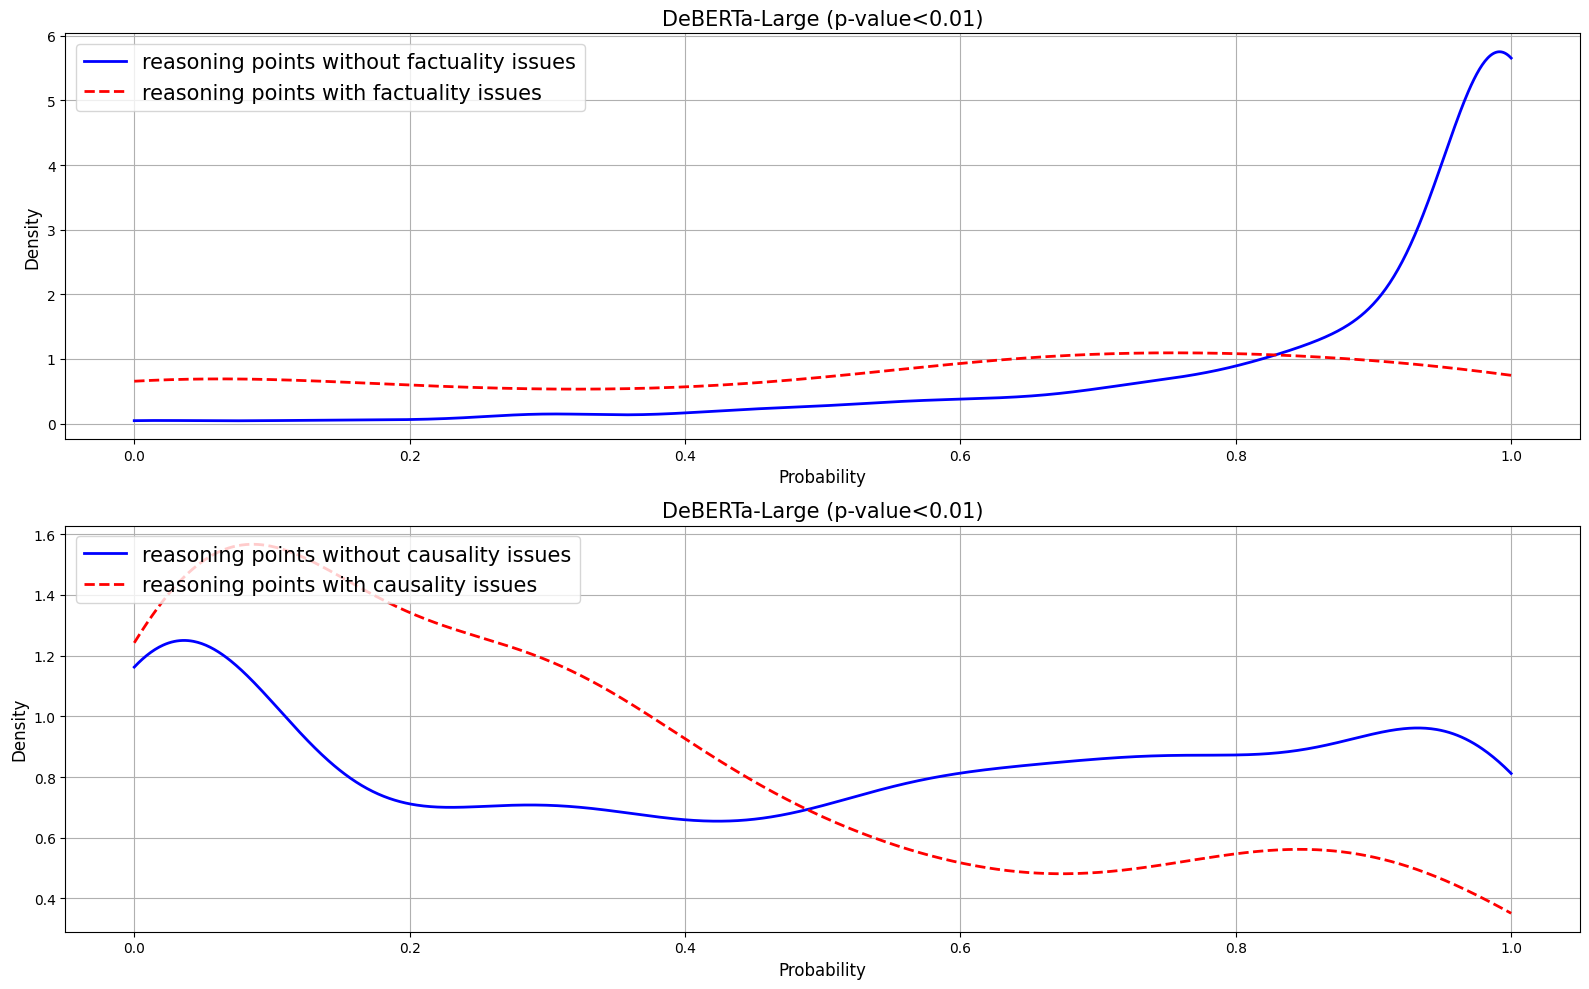

In [4]:
plot_data = [
    (nofacprob_deberta,facprob_deberta, "DeBERTa-Large (p-value<0.01)"),
    (nocauprob_deberta,cauprob_deberta, "DeBERTa-Large (p-value<0.01)")
    
]

fig, axs = plt.subplots(2, 1, figsize=(16, 10))  
axs = axs.flatten()  

x_vals = np.linspace(0, 1, 1000)

for i, (df1, df2, title) in enumerate(plot_data):
    kde_x = gaussian_kde(df1)
    kde_y = gaussian_kde(df2)
    pdf_x = kde_x(x_vals)
    pdf_y = kde_y(x_vals)

    ax = axs[i]
    ax.plot(x_vals, pdf_x, linewidth=2, color="blue")
    ax.plot(x_vals, pdf_y, linewidth=2, linestyle="dashed", color="red")

    if i ==0:
        
        legend_labels = ["reasoning points without factuality issues", "reasoning points with factuality issues"]
        ax.legend(legend_labels, loc="upper left", fontsize=15)
        #ax.set_ylim(0, 22)
    elif i==1:
        legend_labels = ["reasoning points without causality issues", "reasoning points with causality issues"]
        ax.legend(legend_labels, loc="upper left", fontsize=15)
        #ax.set_ylim(0, 8)


    
    ax.set_xlabel("Probability", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.set_title(title, fontsize=15)
    ax.grid(True)

plt.tight_layout()
plt.show()